**Aplicação de técnicas de classificação de texto na arquitetura de Chatbots hierárquicos**

**Mestrado Profissional em Computação Aplicada - PPCA - Universidade de Brasília**

**Disciplina**: Mineração de Dados

**Orientador**: Prof. Dr. Marcelo Ladeira <mladeira@unb.br>

**Alunos**: 
 - José Ronaldo Agra De Souza Filho <jose.agra@aluno.unb.br>
 - Bruno Gomes Resende <bruno.resende@aluno.unb.br>
 - Célio Castro Wermelinger <celio.wermelinger@aluno.unb.br> 

**Palavras-Chave:**

Chatbot; Text Classification; Machine Learning; Text Mining; NLP;

In [1]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret

In [2]:
# Import packages
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.classification import *
import pandas as pd

# download das stopwords para o idioma português
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Montagem de datasets
df_covid = pd.read_csv('data/exemplos-treinamento-covid.csv', delimiter=';')
df_seloturismo = pd.read_csv('data/exemplos-treinamento-seloturismo.csv', delimiter=';')
df_tuberculose = pd.read_csv('data/exemplos-treinamento-tuberculose.csv', delimiter=';')
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)
df_all.describe()

,input,category
count,1042,1042
unique,1041,3
top,qual a vantagem de usar o selo,seloturismo
freq,2,639


In [4]:
# recupera as stopwords para o idioma português
stop_words = stopwords.words('portuguese')

# Vetorização das palavras
tv = TfidfVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")
tf_idf = tv.fit_transform(df_all['input'])
tf_idf_df = pd.DataFrame(tf_idf.toarray(), columns=tv.get_feature_names())
tf_idf_df['target_cat'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':1, 'tuberculose':2})
tf_idf_df

,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,...,virilha,virus,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.379376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1038,0.0,0.0,0.0,0.0,0.499479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1039,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1040,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [5]:
# Setup
# Iniciando os recursos da biblioteca, passando como alvo a coluna 'class' do dataset
setup = setup(data=tf_idf_df, target='target_cat', session_id=20221, train_size = 0.7, fold=10)

,Description,Value
0,Session id,20221
1,Target,target_cat
2,Target type,Multiclass
3,Original data shape,"(1042, 1047)"
4,Transformed data shape,"(1042, 872)"
5,Transformed train set shape,"(729, 872)"
6,Transformed test set shape,"(313, 872)"
7,Numeric features,1046
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Gerando modelos com diferentes abordagens e escolhendo o melhor por cross-validation
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9739,0.9977,0.9739,0.9753,0.9734,0.9509,0.9524,0.1110
svm,SVM - Linear Kernel,0.9712,0.0000,0.9712,0.9724,0.9705,0.9461,0.9476,0.0470
dt,Decision Tree Classifier,0.9643,0.9558,0.9643,0.9661,0.9634,0.9327,0.9349,0.0590
ridge,Ridge Classifier,0.9630,0.0000,0.9630,0.9653,0.9617,0.9298,0.9327,0.0470
rf,Random Forest Classifier,0.9629,0.9986,0.9629,0.9655,0.9619,0.9295,0.9325,0.1040
gbc,Gradient Boosting Classifier,0.9602,0.9912,0.9602,0.9626,0.9592,0.9247,0.9274,0.3980
lr,Logistic Regression,0.9355,0.9994,0.9355,0.9419,0.9317,0.8750,0.8830,0.5680
ada,Ada Boost Classifier,0.9341,0.9749,0.9341,0.9406,0.9294,0.8720,0.8806,0.1080
knn,K Neighbors Classifier,0.9328,0.9913,0.9328,0.9348,0.9318,0.8760,0.8777,0.0630
lightgbm,Light Gradient Boosting Machine,0.9314,0.9835,0.9314,0.9372,0.9275,0.8676,0.8752,0.0630


In [7]:
# Imprimindo melhor modelo
print(modelos)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=20221, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,0.9991,0.9863,0.9866,0.9861,0.9745,0.9749
1,0.9589,0.9992,0.9589,0.9615,0.9580,0.9217,0.9247
2,0.9726,0.9998,0.9726,0.9738,0.9720,0.9486,0.9501
3,0.9863,0.9998,0.9863,0.9866,0.9861,0.9745,0.9749
4,0.9589,0.9928,0.9589,0.9615,0.9580,0.9217,0.9247
5,0.9589,0.9974,0.9589,0.9603,0.9580,0.9233,0.9243
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9589,0.9998,0.9589,0.9615,0.9581,0.9237,0.9265
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


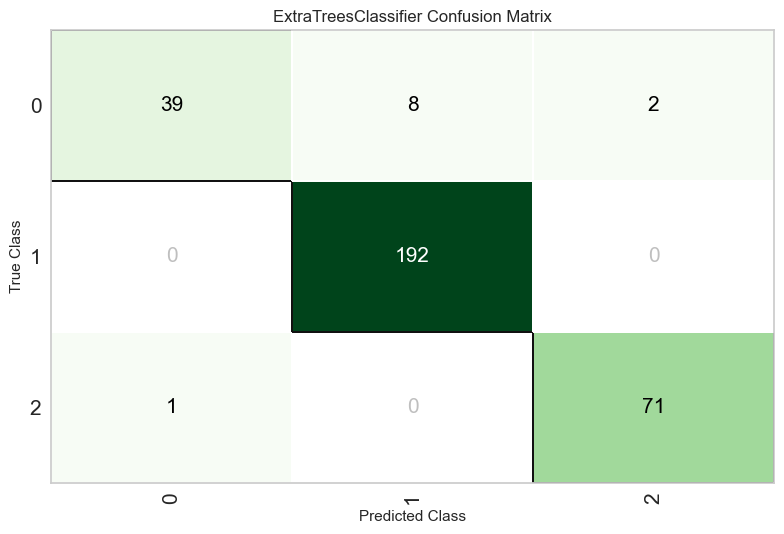

In [8]:
# Matriz de confusão TF-IDF
et = create_model('et')
plot_model(et, "confusion_matrix")

## Predição

In [9]:
# Realizando predição com dateset de validação
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9649,0.9970,0.9649,0.9652,0.9634,0.9342,0.9358


,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,acrescimos,...,virus,visitar,visivel,vistoria,vistorias,voltar,vou,target_cat,Label,Score
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.99
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.286045,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.83
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.94
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.99
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.97
1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.327599,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.84
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.98
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.00


In [10]:
# Realizando predição com dateset inteiro
predictions = predict_model(et, data=tf_idf_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9894,0.9994,0.9894,0.9895,0.9893,0.9805,0.9807


,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,acrescimos,...,virus,visitar,visivel,vistoria,vistorias,voltar,vou,target_cat,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.93
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.379376,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00


In [11]:
# Treinando o melhor modelo com Bagging e Boosting e escolhendo o melhor método entre estes 
# Caso a performance do modelo treinado seja inferior ao melhor modelo original, este é retornado
best_ensembled = ensemble_model(et, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9452,0.9996,0.9452,0.9497,0.9403,0.8941,0.9007
1,0.9589,0.9990,0.9589,0.9615,0.9580,0.9217,0.9247
2,0.9589,0.9990,0.9589,0.9615,0.9584,0.9219,0.9248
3,0.9863,0.9998,0.9863,0.9866,0.9861,0.9745,0.9749
4,0.9589,0.9937,0.9589,0.9615,0.9580,0.9217,0.9247
5,0.9589,0.9954,0.9589,0.9603,0.9580,0.9233,0.9243
6,0.9726,1.0000,0.9726,0.9738,0.9717,0.9486,0.9502
7,0.9589,0.9998,0.9589,0.9615,0.9581,0.9237,0.9265
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


In [12]:
predict_model(best_ensembled)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9649,0.9970,0.9649,0.9652,0.9634,0.9342,0.9358


,abraco,acesso,acho,acionar,acompanhamento,acontece,acontecera,acordo,acrescimo,acrescimos,...,virus,visitar,visivel,vistoria,vistorias,voltar,vou,target_cat,Label,Score
729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.99
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.286045,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.83
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.94
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.99
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.97
1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.327599,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.84
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.98
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.00


In [13]:
modelo_final = finalize_model(best_ensembled)

# Salvando o modelo
save_model(best_ensembled, 'models/20220913-modelo-final-multiclasses-tdidf-et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\bruno\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['abdomen', 'abracar', 'abraco',
                                              'acesso', 'acho', 'acionar',
                                              'acometer', 'acometidos',
                                              'acompanhamento', 'acontece',
                                              'acontecera', 'acordo', 'acougue',
                                              'acrescido', 'acrescimo',
                                              'acrescimos', 'aderi', 'aderir',
                                              'aderiram', 'ad...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
             